In [452]:
from qiskit import QuantumCircuit, QuantumRegister

def XXYY(qc: QuantumCircuit, theta: float, q1: int, q2: int, trot: int):
    for i in range(trot):
        qc.rxx(theta/trot, q1, q2)
        qc.ryy(theta/trot, q1, q2)

qc = QuantumCircuit(2)
XXYY(qc, 2, 0, 1, 3)
qc.draw()

┌───────────────┐┌───────────────┐┌───────────────┐┌───────────────┐»
q_0: ┤0              ├┤0              ├┤0              ├┤0              ├»
     │  Rxx(0.66667) ││  Ryy(0.66667) ││  Rxx(0.66667) ││  Ryy(0.66667) │»
q_1: ┤1              ├┤1              ├┤1              ├┤1              ├»
     └───────────────┘└───────────────┘└───────────────┘└───────────────┘»
«     ┌───────────────┐┌───────────────┐
«q_0: ┤0              ├┤0              ├
«     │  Rxx(0.66667) ││  Ryy(0.66667) │
«q_1: ┤1              ├┤1              ├
«     └───────────────┘└───────────────┘

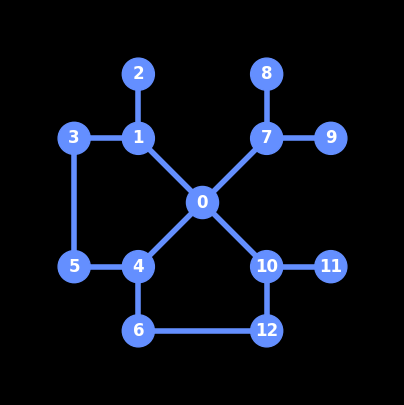

In [453]:
from qiskit.visualization import plot_coupling_map

num_qubits = 13
qubit_coordinates = [[2, 2], [1, 1], [0, 1], [1, 0], [3, 1], [3, 0], [4, 1], [1, 3], [0, 3], [1, 4], [3, 3], [3, 4], [4, 3]]
coupling_map = [(0,1),(1,2),(1,3),(0,4),(4,5),(4,6),(3,5),(0,10),(10,11),(10,12),(6,12),(0,7),(7,9),(7,8)]
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

In [454]:
import random
def find_group(coupling_map):
    # Initialize the step of each edge to None
    steps = {edge: None for edge in coupling_map}
    # Sort the coupling_map by their first node
    sorted_coupling_map = sorted(coupling_map)
    # Assign steps
    for edge in sorted_coupling_map:
        # Find the steps of the adjacent coupling_map
        adjacent_steps = {steps[e] for e in sorted_coupling_map if e != edge and (e[0] == edge[0] or e[1] == edge[0] or e[0] == edge[1] or e[1] == edge[1])}
        # Assign the smallest step that is not in adjacent_steps
        step = 0
        while step in adjacent_steps:
            step += 1
        steps[edge] = step
    # The number of steps is the maximum step plus one
    num_steps = max(steps.values()) + 1
    grouped_map = [[] for i in range(num_steps)]
    for edge, step in steps.items():
        grouped_map[step].append(edge)
    color_list = []
    c = [[random.random() for i in range(4)] for j in range(num_steps)]
    for edge in coupling_map:
        color_list.append(c[steps[edge]])
    return grouped_map, color_list

grouped_map, color_list = find_group(coupling_map)
print(len(grouped_map))

4


8


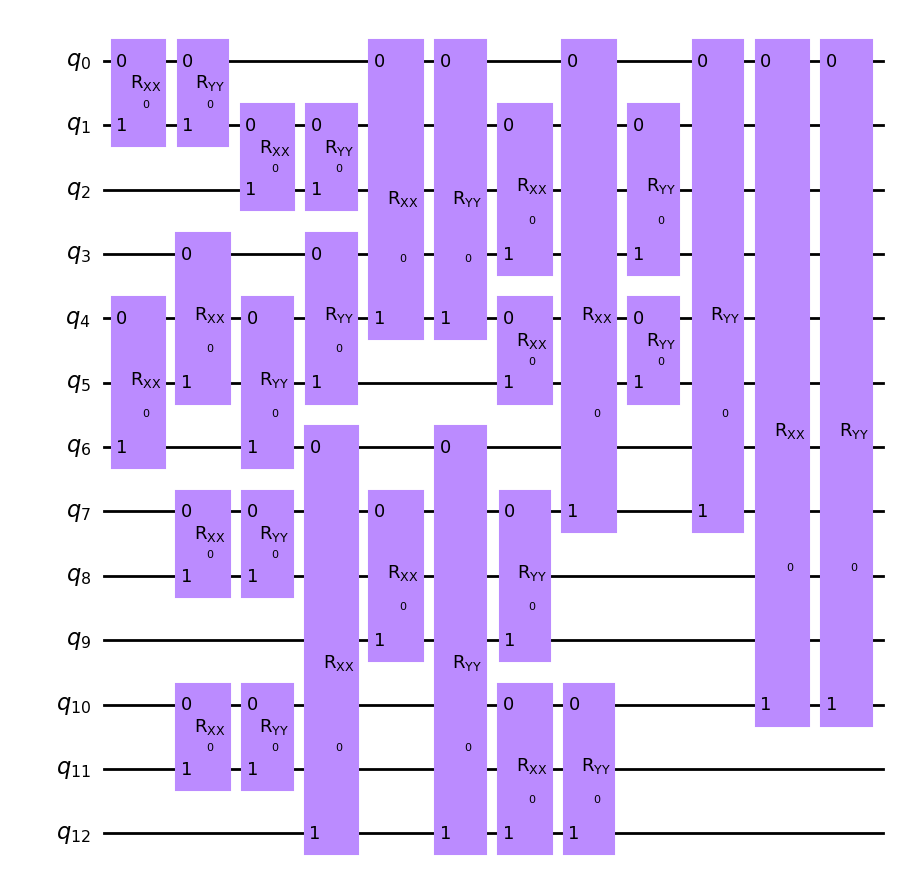

In [455]:
params = range(len(coupling_map))
qc = QuantumCircuit(num_qubits)
index = 0
for step in grouped_map:
    for pairs in step:
        XXYY(qc, params[0], pairs[0], pairs[1], trot=1)
        index += 1
print(qc.depth())
qc.draw('mpl')

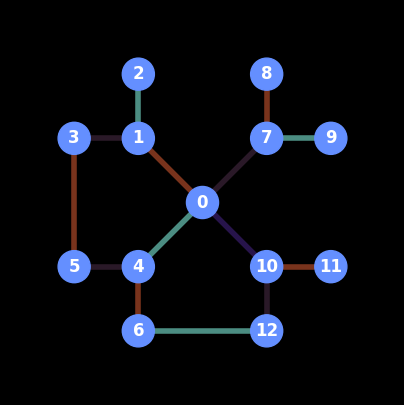

In [456]:
num_qubits = 13
qubit_coordinates = [[2, 2], [1, 1], [0, 1], [1, 0], [3, 1], [3, 0], [4, 1], [1, 3], [0, 3], [1, 4], [3, 3], [3, 4], [4, 3]]
coupling_map = [(0,1),(1,2),(1,3),(0,4),(4,5),(4,6),(3,5),(0,10),(10,11),(10,12),(6,12),(0,7),(7,9),(7,8)]
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map, line_color=color_list)

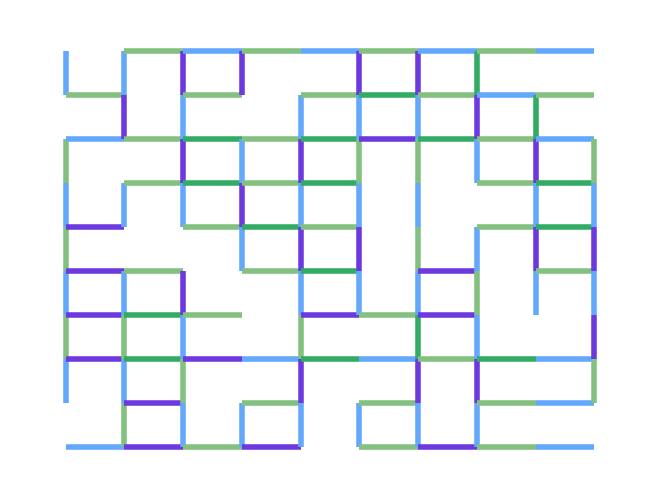

In [479]:
import networkx as nx

# Number of nodes (spins) in the SK model
num_nodes = 64

# Create a fully connected graph
import networkx as nx
import matplotlib.pyplot as plt
import random

rows = 10
columns = 10


def generate_lattice_with_defects(rows, columns, defect_probability):
    G = nx.Graph()

    # Create nodes
    for i in range(rows):
        for j in range(columns):
            node_id = i * columns + j
            G.add_node(node_id)

    # Connect nodes with lattice structure
    for i in range(rows):
        for j in range(columns):
            node_id = i * columns + j

            # Connect to the right neighbor
            if j < columns - 1:
                G.add_edge(node_id, node_id + 1)

            # Connect to the bottom neighbor
            if i < rows - 1:
                G.add_edge(node_id, node_id + columns)

    # Introduce defects
    for edge in list(G.edges()):
        if random.random() < defect_probability:
            G.remove_edge(*edge)

    return G


# Generate a 5x5 lattice graph with defects
graph = generate_lattice_with_defects(rows, columns, 0.2)
edges = graph.edges()
grouped_map, color_list = find_group(edges)
pos = {i * rows + j: [i, j] for i in range(rows) for j in range(columns)}

# Draw the graph
nx.draw(graph, alpha=1, width=4, node_size=0, edge_color=color_list, pos=pos)

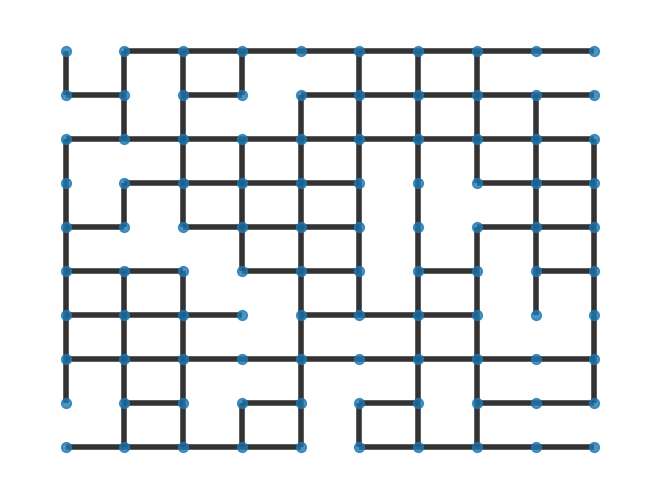

In [480]:
nx.draw(graph, alpha=0.8, width=4, node_size=50, pos=pos)